In [1]:
import torchvision
import torch

## 1. 准备数据集 

In [2]:
train_data = torchvision.datasets.CIFAR10(
    root = "../../../datas",
    train = True,
    transform = torchvision.transforms.ToTensor(),
    download = True
)

Files already downloaded and verified


In [3]:
test_data = torchvision.datasets.CIFAR10(
    root = "../../../datas",
    train = False,
    transform = torchvision.transforms.ToTensor(),
    download = True
)

Files already downloaded and verified


In [4]:
train_data_size = len(train_data)
train_data_size

50000

In [5]:
test_data_size = len(test_data)
test_data_size

10000

## 2. 加载数据集 

In [6]:
train_dataloader = torch.utils.data.DataLoader(
    train_data,
    batch_size = 64,
    shuffle = True,
    num_workers = 2
)

In [7]:
teat_dataloader = torch.utils.data.DataLoader(
    test_data,
    batch_size = 64,
    shuffle = True,
    num_workers = 2
)

## 3. 搭建神经网络 

一般放在单独的python文件

In [8]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=3,out_channels=32,kernel_size=5,stride=1,padding=2),
            torch.nn.MaxPool2d(kernel_size=2),
            torch.nn.Conv2d(32,32,5,1,2),
            torch.nn.MaxPool2d(2),
            torch.nn.Conv2d(32,64,5,1,2),
            torch.nn.MaxPool2d(2),
            torch.nn.Flatten(),
            torch.nn.Linear(64*4*4,64),
            torch.nn.Linear(64,10)
        )
        
    def forward(self,x):
        x = self.model(x)
        return x

## 4. 创建网络模型 

In [9]:
model = Model()
input = torch.ones((64,3,32,32))
output = model(input)
print(input.shape)
print(output.shape)

torch.Size([64, 3, 32, 32])
torch.Size([64, 10])


## 5. 损失函数 

In [10]:
loss_fn = torch.nn.CrossEntropyLoss()

## 6. 优化器 

In [11]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

## 7. 设置训练网络的参数 

### 7.1 训练的次数

In [12]:
total_train_step = 0

### 7.2 测试的次数

In [13]:
total_test_step = 0

### 7.3 训练的轮数 

In [14]:
epoch = 10

---

In [15]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter("./project_logs")

In [1]:
for i in range(epoch):
    print("-------------第{}轮训练开始------------".format(i+1))
    # 训练步骤开始
    model.train()
    for data in train_dataloader:
        imgs,targets = data
        outputs = model(imgs)
        loss = loss_fn(outputs,targets)
        
        # 优化器优化模型
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_train_step+=1
        if total_train_step % 100 == 0:
            writer.add_scalar("train_loss",loss.item(),total_train_step)
            print("训练次数：{},loss:{}".format(total_train_step,loss.item()))
        
    # 测试步骤
    model.eval()
    total_test_loss = 0
    total_accuracy = 0
    with torch.no_grad():
        for data in teat_dataloader:
            imgs,targets = data
            outputs = model(imgs)
            loss = loss_fn(outputs,targets)
            total_test_loss += loss.item()
            accuracy = (outputs.argmax(1) == targets).sum()
            total_accuracy+=accuracy
    writer.add_scalar("test_total_loss",total_test_loss,i+1)
    writer.add_scalar("test_accuracy",total_accuracy/test_data_size,i+1)
    print("整体测试集上的loss:{}".format(total_test_loss))
    print("整体测试集上的正确率:{}".format(total_accuracy/test_data_size))
    
    torch.save(model,"./models/model_{}.pth".format(i+1))
    print("模型{}已保存".format(i+1))
writer.close()

NameError: name 'epoch' is not defined

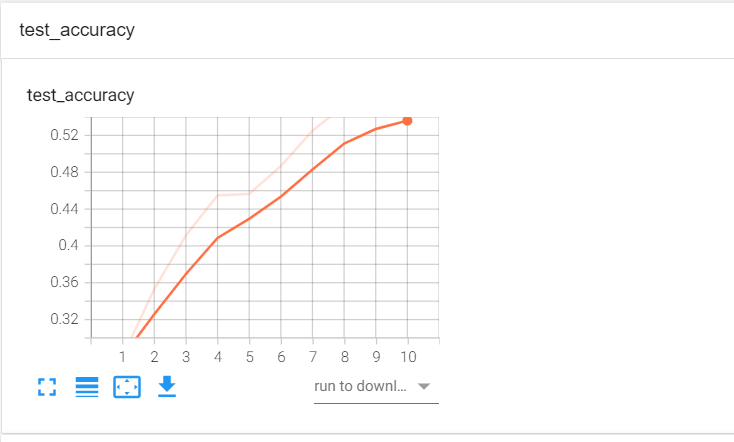

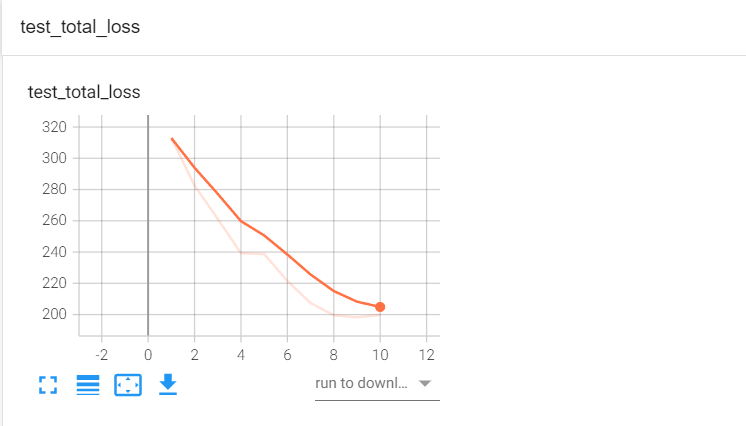

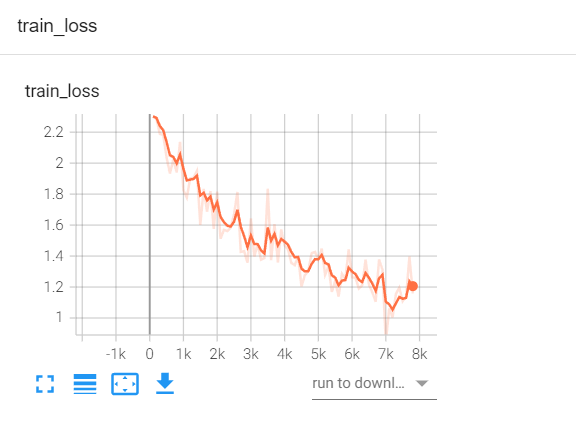